<a href="https://colab.research.google.com/github/Vitalyastiy/courses/blob/main/IBM/Viz_W2(2)-Exercise-Pie-Charts-Box-Plots-Scatter-Plots-and-Bubble-Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Explore Matplotlib library further
* Create pie charts, box plots, scatter plots and bubble charts


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets with *p*andas](#0)<br>
2. [Downloading and Prepping Data](#2)<br>
3. [Visualizing Data using Matplotlib](#4) <br>
4. [Pie Charts](#6) <br>
5. [Box Plots](#8) <br>
6. [Scatter Plots](#10) <br>
7. [Bubble Plots](#12) <br>
</div>



# Exploring Datasets with *pandas* and Matplotlib<a id="0"></a>

Toolkits: The course heavily relies on [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) and [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01).

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) from United Nation's website.

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this lab, we will focus on the Canadian Immigration data.


# Downloading and Prepping Data <a id="2"></a>


The first thing we'll do is install **openpyxl** (formerly **xlrd**), a module that *pandas* requires to read Excel files.


In [ ]:
!mamba install openpyxl==3.0.9 -y

Import primary modules.


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [20]:
df_can =pd.read_excel('https://github.com/Vitalyastiy/courses/blob/main/IBM/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                       skiprows=range(20), #пропустить вначале 20 строк
                       skipfooter= 2 ) #пропустить 2 строки в конце датафрейма
df_can

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's take a look at the first five items in our dataset.


In [21]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's find out how many entries there are in our dataset.


In [22]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Очистите данные. Мы внесем некоторые изменения в исходный набор данных, чтобы упростить создание наших визуализаций. Обратитесь к *Введению в Matplotlib и линейным графикам* и *Площадным графикам, гистограммам и столбчатым графикам* для получения подробного описания этой предварительной обработки.


In [23]:
# очистите набор данных, чтобы удалить ненужные столбцы (например, REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# давайте переименуем столбцы так, чтобы они имели смысл
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# для большей согласованности давайте также сделаем все метки столбцов типа string
df_can.columns = list(map(str, df_can.columns))
# установите название страны в качестве индекса - полезно для быстрого поиска стран с помощью метода .loc
df_can.set_index('Country', inplace=True)
# add total column
df_can['Total'] = df_can.sum(axis=1)
# годы, которые мы будем использовать на этом уроке - пригодятся для построения графиков позже
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-23-cbb0e48e1f8b>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# Visualizing Data using Matplotlib<a id="4"></a>


Import `Matplotlib`.


In [24]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


# Круговые диаграммы <a id="6"></a>

"Круговая диаграмма" - это круговое графическое изображение, которое отображает числовые пропорции путем деления круга (или круговой диаграммы) на пропорциональные части. Скорее всего, вы уже знакомы с круговыми диаграммами, поскольку они широко используются в бизнесе и средствах массовой информации. Мы можем создавать круговые диаграммы в Matplotlib, передавая ключевое слово `kind=pie`.

Давайте воспользуемся круговой диаграммой, чтобы изучить долю (в процентах) новых иммигрантов, сгруппированных по континентам, за весь период времени с 1980 по 2013 год.


Шаг 1: Соберите данные.

Мы будем использовать метод *pandas* `groupby` для обобщения данных об иммиграции по `континентам`. Общий процесс "groupby" включает в себя следующие этапы:

1. ** Разделение:** Разделение данных на группы на основе некоторых критериев.
2. **Применить:** Применение функции к каждой группе независимо:
.сумма()
.count()
.среднее значение()
.std()
.агрегат()
.применить()
.и т.д..
3. **Объединить:** Объединение результатов в структуру данных.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">


In [25]:
# сгруппируйте страны по континентам и примените функцию sum()
df_continents = df_can.groupby('Continent', axis=0).sum()

# примечание: результатом метода groupby является объект `groupby'.
# мы не можем использовать его дальше, пока не применим функцию (например,sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-25-c7193508bba1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Шаг 2: Нанесите данные на график. Мы передадим ключевое слово `kind = 'pie" вместе со следующими дополнительными параметрами:
- `autopct` - это строка или функция, используемая для обозначения клиньев их числовым значением. Этикетка будет помещена внутри клина. Если это строка формата, то метка будет `fmt%pct`.
- `startangle` - поворачивает начало круговой диаграммы на угол в градусах против часовой стрелки от оси x.
- `shadow` - Рисует тень под пирогом (для создания трехмерного эффекта).


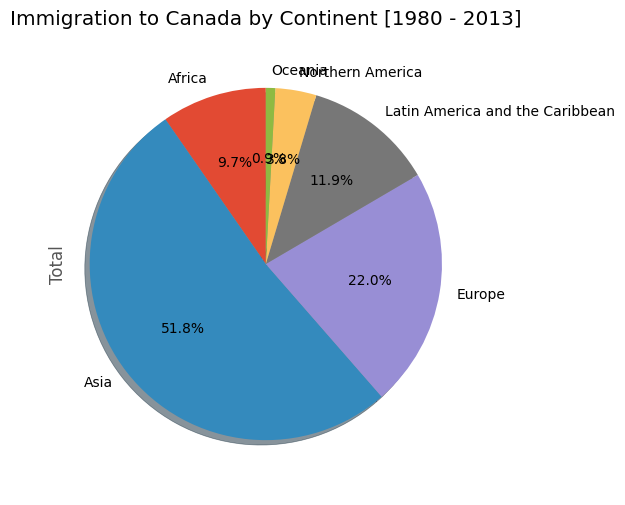

In [43]:
# autopct create %, начальный угол представляет начальную точку
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Приведенное выше изображение не очень четкое, в некоторых случаях цифры и текст перекрываются. Давайте внесем несколько изменений, чтобы улучшить визуальные эффекты:

* Удалите текстовые метки на круговой диаграмме, передав "легенду", и добавьте ее в качестве отдельной легенды, используя "plt.legend()`.
* * Переместите проценты так, чтобы они располагались непосредственно за пределами круговой диаграммы, передав параметр `pctdistance`.
* Введите пользовательский набор цветов для континентов, передав параметр `цвета`.
* ** Разверните круговую диаграмму, чтобы выделить три самых нижних континента (Африку, Северную Америку и Латинскую Америку и Карибский бассейн), передав параметр `развернуть`.

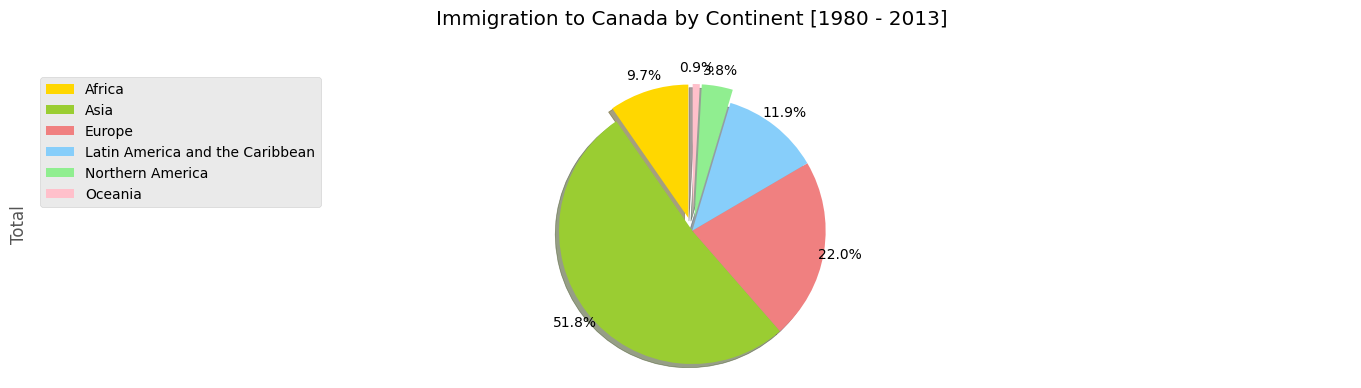

In [46]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # соотношение для каждого континента, с помощью которого можно компенсировать каждый клин.

df_continents['Total'].plot(kind='pie',
                            figsize=(17, 4),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # отключите метки на круговой диаграмме
                            pctdistance=1.12,   # соотношение между центром каждого фрагмента пирога и началом текста, сгенерированного autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list # "взорвать" самые низкие 3 континента
                            )

# увеличьте заголовок на 12%, чтобы он соответствовал pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')
# add legend
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

** Вопрос:** Используя круговую диаграмму, изучите долю (в процентах) новых иммигрантов, сгруппированных по континентам в 2013 году.

** Примечание **: Возможно, вам придется поиграть со значениями explore, чтобы исправить любые перекрывающиеся значения среза.


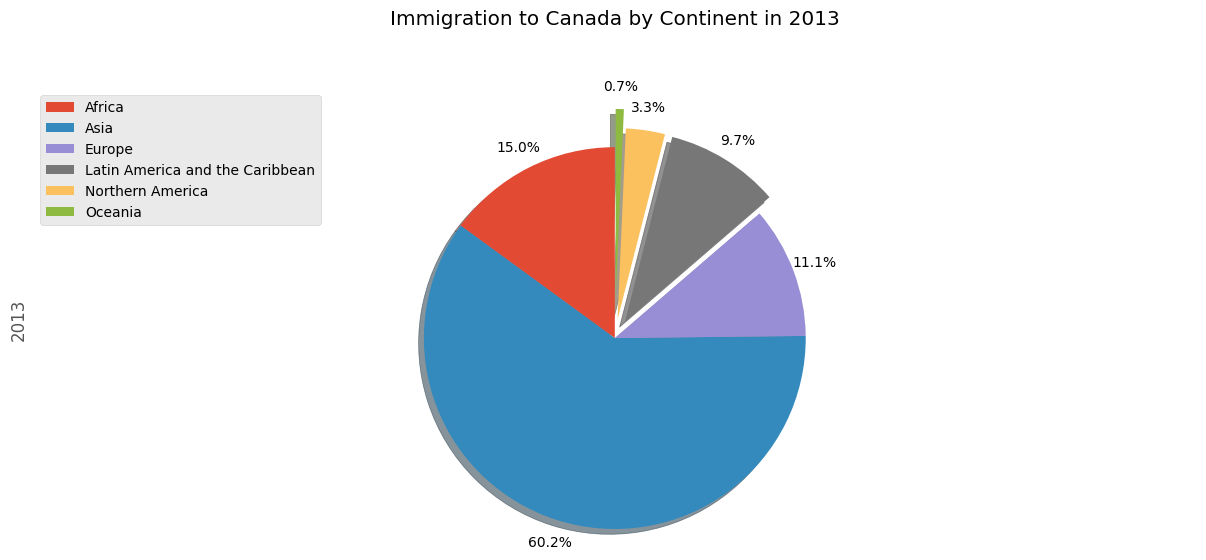

In [55]:
#The correct answer is:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

# show plot
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

    df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%',
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

    # scale the title up by 12% to match pctdistance
    plt.title('Immigration to Canada by Continent in 2013', y=1.12)
    plt.axis('equal')

    # add legend
    plt.legend(labels=df_continents.index, loc='upper left')

    # show plot
    plt.show()

```

</details>


# box plot <a id="8"></a>

`box plot` - это способ статистического представления распределения данных по пяти основным измерениям:

- **Минимум:** Наименьшее число в наборе данных, исключая выбросы.
- ** Первый квартиль:** Среднее число между `минимумом` и `медианой`.
- **Второй квартиль (медиана): ** Среднее число (отсортированного) набора данных.
- ** Третий квартиль: ** Среднее число между `медианой` и `максимумом`.
- **Максимальное:** Наибольшее число в наборе данных без учета выбросов.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">


Чтобы создать "boxplot", мы можем использовать "kind=box" в методе "plot", вызываемом в серии *pandas* или фрейме данных.

Давайте построим график для японских иммигрантов в период с 1980 по 2013 год.

Шаг 1: Получите подмножество набора данных. Несмотря на то, что мы извлекаем данные только для одной страны, мы получим их в виде фрейма данных. Это поможет нам с вызовом метода `dataframe.describe()` для просмотра процентилей.


In [64]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in `kind='box'`.


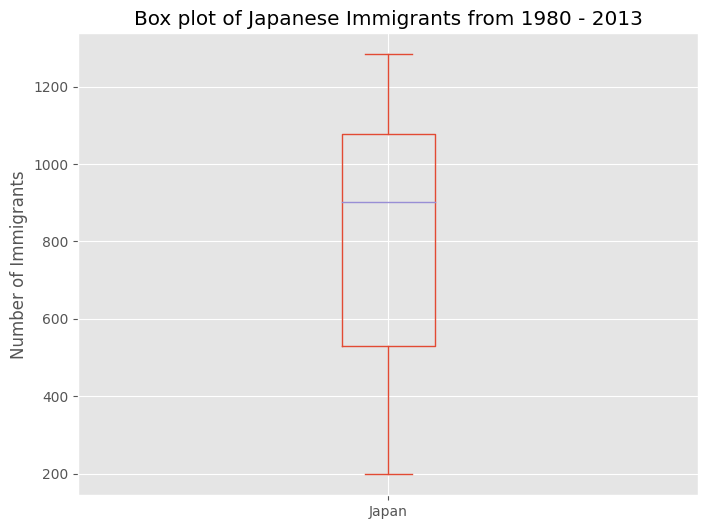

In [65]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Мы можем сразу же сделать несколько ключевых замечаний из приведенного выше графика:
1. Минимальное число иммигрантов составляет около 200 (минимум), максимальное - около 1300 (максимум), а среднее число иммигрантов составляет около 900 (медиана).
2. В 25% случаев за период с 1980 по 2013 год ежегодное количество иммигрантов составляло ~500 человек или меньше (первый квартиль).
2. В 75% случаев за период с 1980 по 2013 год ежегодное количество иммигрантов составляло ~1100 человек или меньше (третий квартиль).

Мы можем просмотреть фактические цифры, вызвав метод `describe()` во фрейме данных.


In [66]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Одним из ключевых преимуществ прямоугольных графиков является сравнение распределения нескольких наборов данных. В одной из предыдущих лабораторных работ мы наблюдали, что в Китае и Индии очень схожие тенденции иммиграции. Давайте проанализируем эти две страны далее, используя прямоугольные графики.

**Вопрос:** Сравните распределение числа новых иммигрантов из Индии и Китая за период с 1980 по 2013 год.


Step 1: Get the dataset for China and India and call the dataframe **df_CI**.


In [78]:
### type your answer here
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI= df_can.loc[['China', 'India'], years].transpose()
    df_CI.head()
```

</details>


Давайте рассмотрим процентили, связанные с обеими странами, используя метод `describe()`.

In [79]:
### type your answer here
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.describe()
```

</details>


Шаг 2: Построение графика данных.


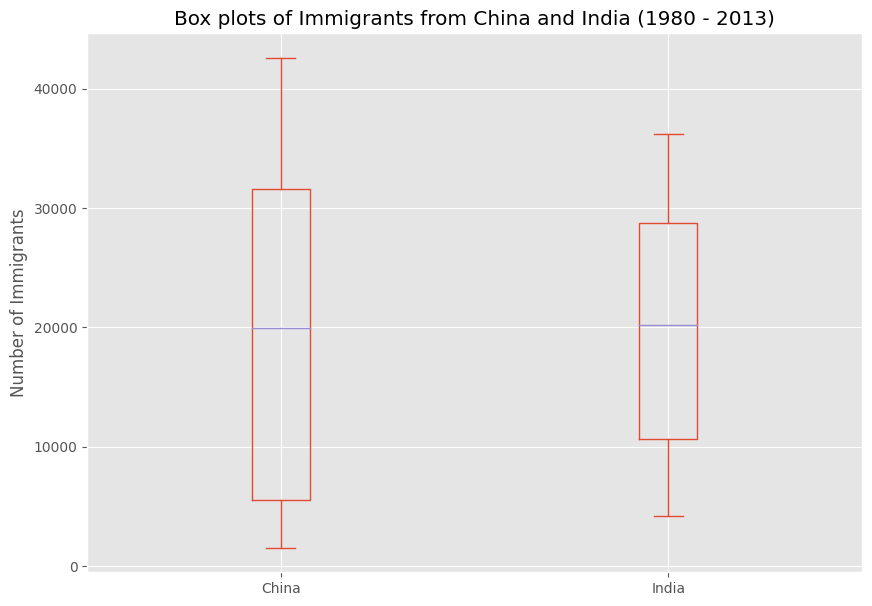

In [80]:
### type your answer here
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.plot(kind='box', figsize=(10, 7))

    plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
    plt.ylabel('Number of Immigrants')

    plt.show()

```

</details>


Мы можем наблюдать, что, хотя в обеих странах среднее число иммигрантов примерно одинаково (~20 000), численность иммигрантов в Китае более обширна, чем в Индии. Максимальная численность населения Индии за любой год (36 210 человек) примерно на 15% ниже, чем максимальная численность населения Китая (42 584 человека).


Если вы предпочитаете создавать горизонтальные прямоугольные графики, вы можете передать параметр `vert` в функции **plot** и присвоить ему значение *False*. Вы также можете указать другой цвет, если вы не большой поклонник красного цвета по умолчанию.


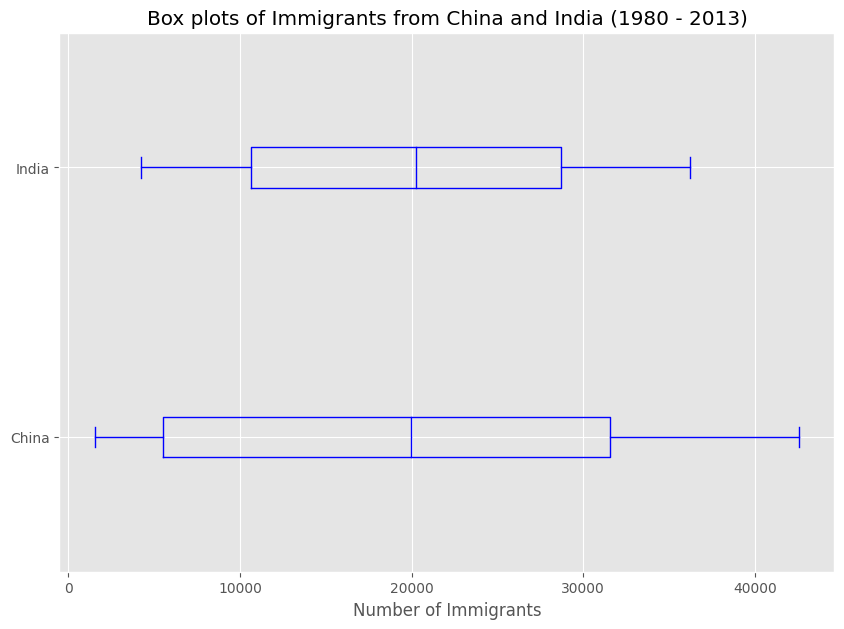

In [82]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

**Подзаголовки**

Часто нам может понадобиться построить несколько графиков на одном рисунке. Например, мы могли бы захотеть провести параллельное сравнение прямоугольного графика с линейным графиком иммиграции в Китай и Индию.

Чтобы визуализировать несколько графиков вместе, мы можем создать ** "фигуру"** (общий холст) и разделить ее на ** "подзаголовки"**, каждый из которых содержит сюжет. С **подзаголовками** мы обычно работаем со слоем **художника** вместо слоя **сценариев**.

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Где
- `nrows` и `ncols` используются для условного разделения фигуры на (`nrows` \* `ncols`) подоси,
- `plot_number` используется для идентификации конкретного подзаголовка, который эта функция должна создать в условной сетке. `plot_number` начинается с 1, сначала увеличивается по строкам и имеет максимум `nrows` * `ncols`, как показано ниже.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">


Затем мы можем указать, в какой подзаголовок поместить каждый график, передав параметр `ax` в методе `plot()` следующим образом:


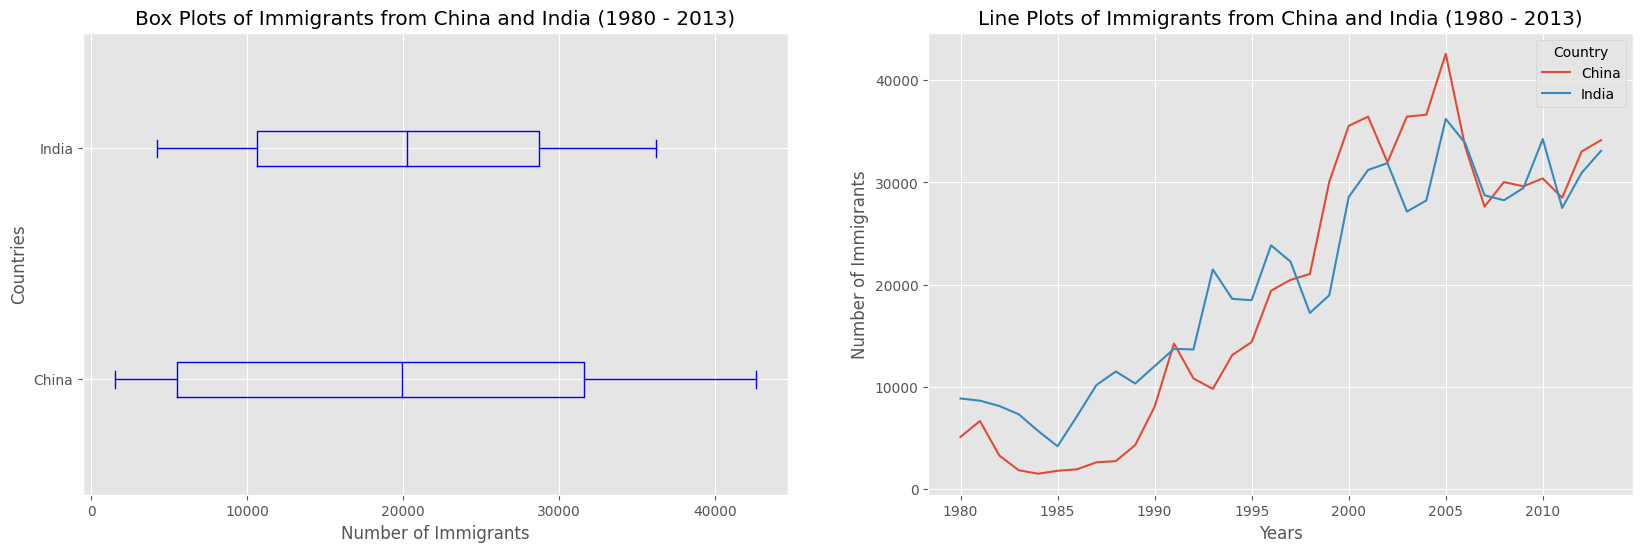

In [83]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # добавить подзаголовок 1 (1 строка, 2 столбца, первый график)
ax1 = fig.add_subplot(1, 2, 2) # добавьте подзаголовок 2 (1 строка, 2 столбца, второй график). Смотрите совет ниже**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

** Совет относительно соглашения о подзаголовке**

В случае, когда `nrows`, `ncols` и `plot_number` все меньше 10, существует удобство, заключающееся в том, что вместо этого может быть указано 3-значное число, где сотни представляют `nrows`, десятки представляют `ncols`, а единицы представляют `plot_number`. Например,
```python
   subplot(211) == subplot(2, 1, 1)
```
создает подзаголовок на рисунке, который представляет верхний график (т.е. первый) в условной сетке размером 2 строки на 1 столбец (на самом деле сетки не существует, но концептуально именно так был позиционирован возвращаемый подзаголовок).


Давайте попробуем что-нибудь более продвинутое.

Ранее мы определили 15 лучших стран по общему объему иммиграции за период с 1980 по 2013 год.

**** Вопрос: ** Создайте блок-график, чтобы визуализировать распределение 15 крупнейших стран (на основе общего объема иммиграции), сгруппированных по *десятилетиям* "1980-е", "1990-е" и "2000-е`.

Шаг 1: Получите набор данных. Получите топ-15 стран по общей численности иммигрантов. Назовите фрейм данных **df_top 15**.


In [ ]:
### type your answer here
df_top15 = df_can.sort_values(by = 'Total', ascending=False).head(15)
df_top15

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
    df_top15

```

</details>


Шаг 2: Создайте новый фрейм данных, который содержит агрегированные данные за каждое десятилетие. Один из способов сделать это:
1. Создайте список всех лет в десятилетиях 80-х, 90-х и 00-х годов.
2. Разрежьте исходный фрейм данных df_can, чтобы создать ряд для каждого десятилетия и суммировать по всем годам для каждой страны.
3. Объедините три ряда в новый фрейм данных. Вызовите свой фрейм данных **new_df**.


In [159]:
### type your answer here
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)


new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # create a list of all years in decades 80's, 90's, and 00's
    years_80s = list(map(str, range(1980, 1990)))
    years_90s = list(map(str, range(1990, 2000)))
    years_00s = list(map(str, range(2000, 2010)))

    # slice the original dataframe df_can to create a series for each decade
    df_80s = df_top15.loc[:, years_80s].sum(axis=1)
    df_90s = df_top15.loc[:, years_90s].sum(axis=1)
    df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # merge the three series into a new data frame
    new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

    # display dataframe
    new_df.head()


```

</details>


Давайте узнаем больше о статистике, связанной с фреймом данных, используя метод `describe()`.


In [120]:
### type your answer here
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:    
    new_df.describe()
```

</details>


Step 3: Plot the box plots.


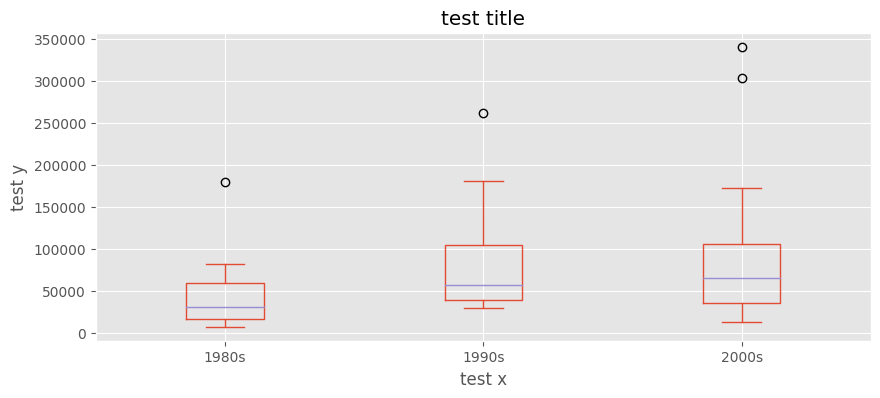

In [146]:
### type your answer here

fig, ax = plt.subplots(figsize=(10, 4))
new_df.plot(kind='box', ax=ax)
ax.set_xlabel('test x')
ax.set_ylabel('test y')
ax.set_title('test title')
plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:    
    new_df.plot(kind='box', figsize=(10, 6))

    plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

    plt.show()

```

</details>


Обратите внимание, чем прямоугольный график отличается от созданной сводной таблицы. Прямоугольный график сканирует данные и идентифицирует выбросы. Чтобы быть выброшенным, значение данных должно быть:<br>
* больше, чем в третьем квартале, по крайней мере, в 1,5 раза по сравнению с межквартильным диапазоном (IQR), или
* меньше, чем в первом квартале, по крайней мере, в 1,5 раза по сравнению с IQR.

Let's look at decade 2000s as an example: <br>
* Q1 (25%) = 36,101.5 <br>
* Q3 (75%) = 105,505.5 <br>
* IQR = Q3 - Q1 = 69,404 <br>

Используя определение выброса, любое значение, превышающее Q3 в 1,5 раза по IQR, будет помечено как выброс.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5


In [160]:
# давайте проверим, сколько записей превышает пороговое значение выброса

new_df = new_df.reset_index()

new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:    
    new_df=new_df.reset_index()
    new_df[new_df['2000s']> 209611.5]

```

</details>


<!-- The correct answer is:
new_df[new_df['2000s']> 209611.5]
-->


Китай и Индия оба считаются выбывшими, поскольку их население за десятилетие превысило 209 611,5 человек.

Boxplot - это продвинутый инструмент визуализации, и существует множество опций и настроек, которые выходят за рамки данной лабораторной работы. Пожалуйста, обратитесь к документации [Matplotlib](http://matplotlib.org/api/pyplot_api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01#matplotlib.pyplot.boxplot) on box plots for more information.


# Scatter Plots <a id="10"></a>

`Точечная диаграмма` (2D) - это полезный метод сравнения переменных друг с другом. "Точечные" графики похожи на "линейные графики" в том смысле, что они отображают независимые и зависимые переменные на двумерном графике. В то время как точки данных соединены вместе линией на линейном графике, они не соединены на точечном графике. Считается, что данные на точечной диаграмме отражают тенденцию. При дальнейшем анализе с использованием таких инструментов, как регрессия, мы можем математически рассчитать эту взаимосвязь и использовать ее для прогнозирования тенденций за пределами набора данных.

Давайте начнем с изучения следующего:

Используя "точечную диаграмму", давайте визуализируем тенденцию общей иммиграции в Канаду (все страны вместе взятые) за 1980-2013 годы.


Шаг 1: Получите набор данных. Поскольку мы ожидаем использовать соотношение между `годами` и `общей численностью населения`, мы преобразуем `годы` в тип `int`.

In [163]:
# мы можем использовать метод sum(), чтобы получить общую численность населения за год
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# измените годы на тип int (полезно для последующей регрессии)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Шаг 2: Нанесите данные на график. В `Matplotlib` мы можем создать набор графиков `scatter`, передав `kind='scatter" в качестве аргумента графика. Нам также нужно будет ввести ключевые слова `x` и `y`, чтобы указать столбцы, которые идут по осям x и y.

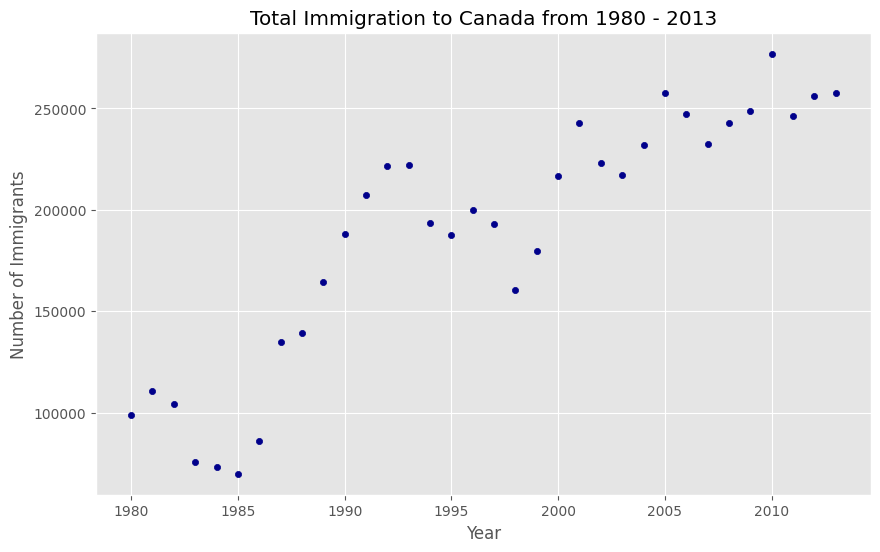

In [164]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Обратите внимание, что точечная диаграмма не соединяет точки данных вместе. Мы можем четко наблюдать тенденцию к росту в данных: с годами общее число иммигрантов увеличивается. Мы можем математически проанализировать этот восходящий тренд, используя линию регрессии (линию наилучшего соответствия).

Итак, давайте попробуем построить линейную линию наилучшего соответствия и использовать ее для прогнозирования числа иммигрантов в 2015 году.

Шаг 1: Получите уравнение линии наилучшего соответствия. Мы будем использовать метод polyfit() от **Numpy**, передав следующий:
- `x`: x-координаты данных.
- `y`: y-координаты данных.
- `deg`: степень подгонки многочлена. 1 = линейный, 2 = квадратичный и так далее.


In [166]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])


На выходе получается массив с полиномиальными коэффициентами, сначала с наибольшими степенями. Поскольку мы строим график линейной регрессии `y = a * x + b`, наш вывод содержит 2 элемента `[5.56709228e +03, -1.09261952e+07]` с наклоном в положении 0 и перехватом в положении 1.

Шаг 2: Постройте линию регрессии на `точечной диаграмме`.


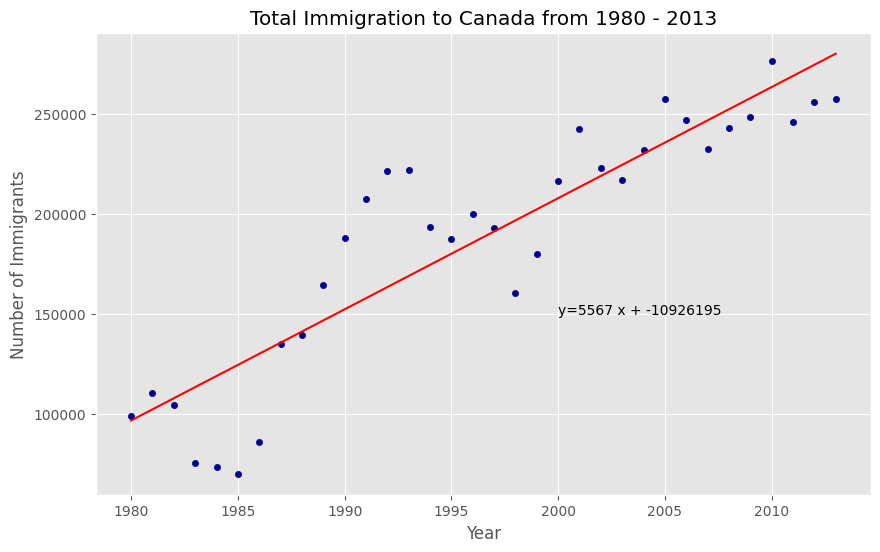

'No. Immigrants = 5567 * Year + -10926195'

In [168]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# сюжетная линия, наиболее подходящая
plt.plot(x, fit[0] * x + fit[1], color='red') # напомним, что x - это годы
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# распечатайте линию наилучшего соответствия
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

Используя уравнение линии наилучшего соответствия, мы можем оценить количество иммигрантов в 2015 году:
```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```
По сравнению с фактическими данными Службы гражданства и иммиграции Канады(CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01),мы видим, что в 2015 году Канада приняла 271 845 иммигрантов. Наше оценочное значение в 291 310 человек находится в пределах 7% от фактического числа, что довольно хорошо, учитывая, что наши первоначальные данные были получены от Организации Объединенных Наций (и могут незначительно отличаться от данных CIC).

В качестве дополнительного примечания мы можем отметить, что иммиграция резко сократилась примерно в 1993-1997 годах. Дальнейший анализ темы показал, что в 1993 году Канада представила законопроект C-86, который внес изменения в систему определения статуса беженца, в основном ограничительные. Дальнейшие поправки к иммиграционным правилам отменили спонсорство, требуемое для "родственников, которым оказывается помощь", и снизили начисляемые им баллы, что усложнило иммиграцию в Канаду для членов семьи (кроме нуклеарной семьи). Эти ограничительные меры оказали непосредственное влияние на численность иммиграции в течение следующих нескольких лет.


** Вопрос**: Создайте точечную диаграмму общей иммиграции из Дании, Норвегии и Швеции в Канаду с 1980 по 2013 год?


**Шаг 1**: Получите данные:
1. Создайте фрейм данных, состоящий только из чисел, связанных с Данией, Норвегией и Швецией. Назовите это **df_countries**.
2. Просуммируйте данные об иммиграции во всех трех странах за каждый год и преобразуйте результат в таблицу данных. Назовите этот новый фрейм данных **df_total**.
3. Установите индекс на место.
4. Переименуйте столбцы в **год** и **всего**.
5. Отобразите результирующий фрейм данных.


In [ ]:
### type your answer here

df_countries=df_can.loc[['Denmark', 'Norway', 'Sweden'], years].T
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']
df_total


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:  
    
    # create df_countries dataframe
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # show resulting dataframe
    df_total.head()


```

</details>


**Шаг 2**: Сгенерируйте точечную диаграмму, построив общее значение в зависимости от года в ** df_total **.


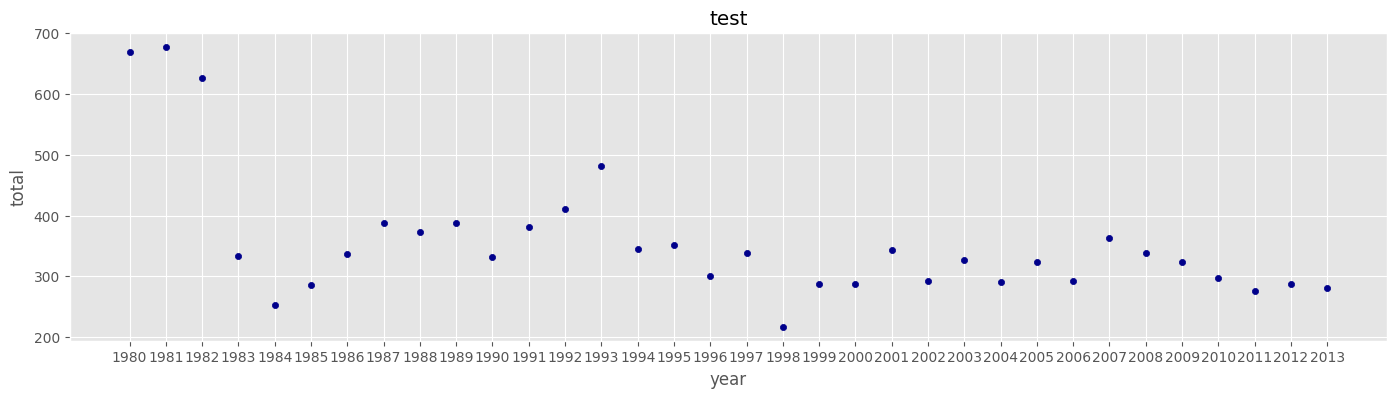

In [196]:
### type your answer here
fig, ax = plt.subplots(figsize = (17,4))
df_total.plot(kind= 'scatter', x = 'year', y = 'total' , ax = ax, color = 'darkblue')
ax.set_title('test')
plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:  
    
    # generate scatter plot
    df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

    # add title and label to axes
    plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
    plt.xlabel('Year')
    plt.ylabel('Number of Immigrants')

    # show plot
    plt.show()


```

</details>


# Bubble Plots <a id="12"></a>

`Пузырьковая диаграмма" - это разновидность "точечной диаграммы", которая отображает данные в трех измерениях (x, y, z). Точки данных заменяются пузырьками, а размер пузырька определяется третьей переменной "z", также известной как вес. В `maplotlib` мы можем передать массив или скаляр параметра `s` в `plot()`, который содержит вес каждой точки.

**Давайте начнем с анализа последствий великой депрессии в Аргентине**.

Аргентина пережила великую депрессию с 1998 по 2002 год, которая привела к массовой безработице, беспорядкам, падению правительства и дефолту по внешнему долгу страны. Что касается доходов, то более 50% аргентинцев были бедными, и семь из десяти аргентинских детей были бедными в разгар кризиса в 2002 году.

Давайте проанализируем последствия этого кризиса и сравним иммиграцию в Аргентину с иммиграцией в соседнюю Бразилию. Давайте сделаем это, используя "график пузырей" иммиграции из Бразилии и Аргентины за 1980-2013 годы. Мы установим веса для пузыря как *нормализованное* значение численности населения за каждый год.


**Шаг 1**: Получите данные по Бразилии и Аргентине. Как и в предыдущем примере, мы преобразуем `Years` в тип int и включим его во фрейм данных.


In [197]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


**Шаг 2**: Создайте нормализованные веса.

В статистике существует несколько методов нормализации, каждый из которых используется по-своему. В этом случае мы будем использовать [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) чтобы привести все значения в диапазон [0, 1]. Общая формула такова:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">
где $X$ - исходное значение, $X'$ - соответствующее нормализованное значение. Формула устанавливает максимальное значение в наборе данных равным 1, а минимальное - 0. Остальные точки данных масштабируются соответственно до значения в диапазоне от 0 до 1.


In [201]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

**Шаг 3**: Нанесите данные на график.
- Чтобы построить две разные точечные диаграммы на одном графике, мы можем включить оси одного графика в другой, передав их через параметр `ax`.
- Мы также передадим веса, используя параметр `s`. Учитывая, что нормализованные веса находятся в диапазоне от 0 до 1, они не будут видны на графике. Поэтому мы будем:
- умножьте веса на 2000, чтобы увеличить их на графике, и,
- добавьте 10, чтобы компенсировать минимальное значение (которое имеет вес 0 и, следовательно, масштабируется с помощью $ \ умножить на 2000$).


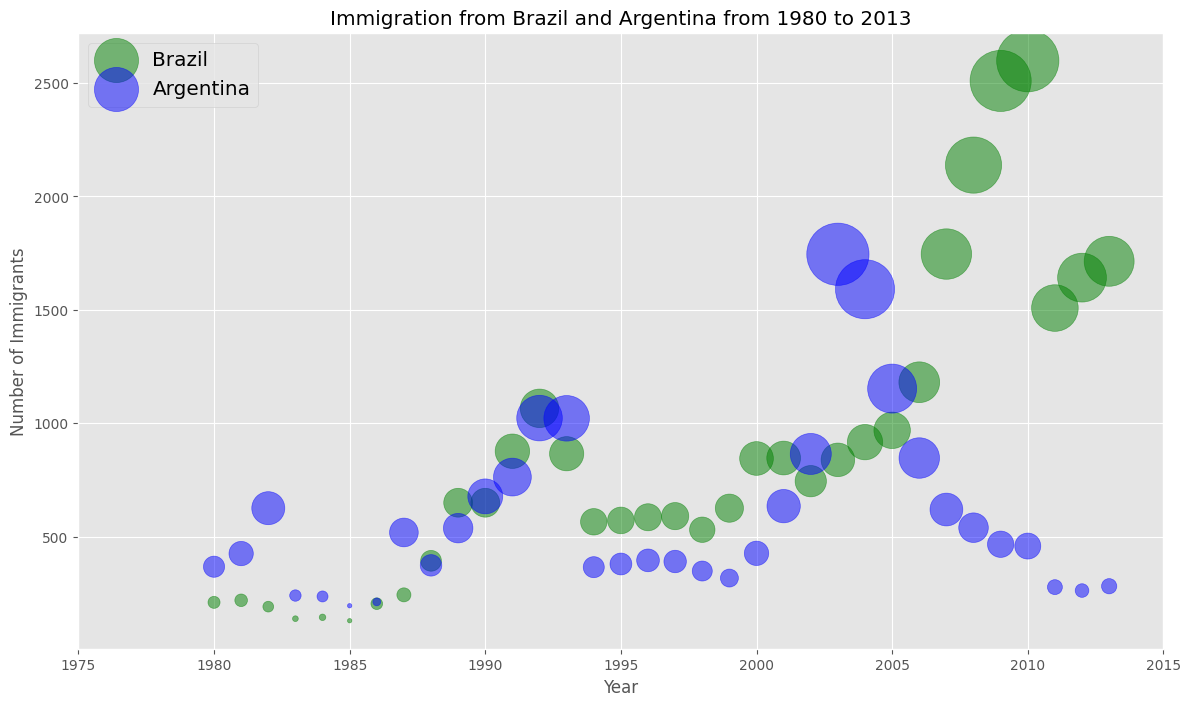

In [199]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Размер пузыря соответствует величине иммигрирующего населения за этот год по сравнению с данными за 1980-2013 годы. Чем больше пузырь, тем больше иммигрантов прибывает в этот год.

Из приведенного выше графика мы можем видеть соответствующий рост иммиграции из Аргентины во время великой депрессии 1998-2002 годов. Мы также можем наблюдать аналогичный всплеск примерно с 1985 по 1993 год. На самом деле Аргентина переживала великую депрессию с 1974 по 1990 год, как раз перед началом великой депрессии 1998-2002 годов.

Аналогичным образом, Бразилия пострадала от "эффекта Самбы", когда бразильский реал (валюта) упал почти на 35% в 1999 году. Существовали опасения по поводу южноамериканского финансового кризиса, поскольку многие южноамериканские страны сильно зависели от экспорта промышленной продукции из Бразилии. Впоследствии бразильское правительство приняло программу жесткой экономии, и экономика медленно восстанавливалась на протяжении многих лет, кульминацией которой стал резкий рост в 2010 году. Данные об иммиграции отражают эти события.


** Вопрос **: Ранее в этой лаборатории мы создали прямоугольные графики для сравнения иммиграции из Китая и Индии в Канаду. Создайте пузырьковые графики иммиграции из Китая и Индии, чтобы визуализировать любые различия во времени с 1980 по 2013 год. Вы можете использовать **df_can_t**, который мы определили и использовали в предыдущем примере.


Шаг 1: Нормализуйте данные, относящиеся к Китаю и Индии.


In [207]:
### type your answer here

norm_china = (df_can_t['China'] - df_can_t['China'].min())/(df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min())/(df_can_t['India'].max() - df_can_t['India'].min())



<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:  
    
    # normalized Chinese data
    norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
    # normalized Indian data
    norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


```

</details>


Step 2: Generate the bubble plots.


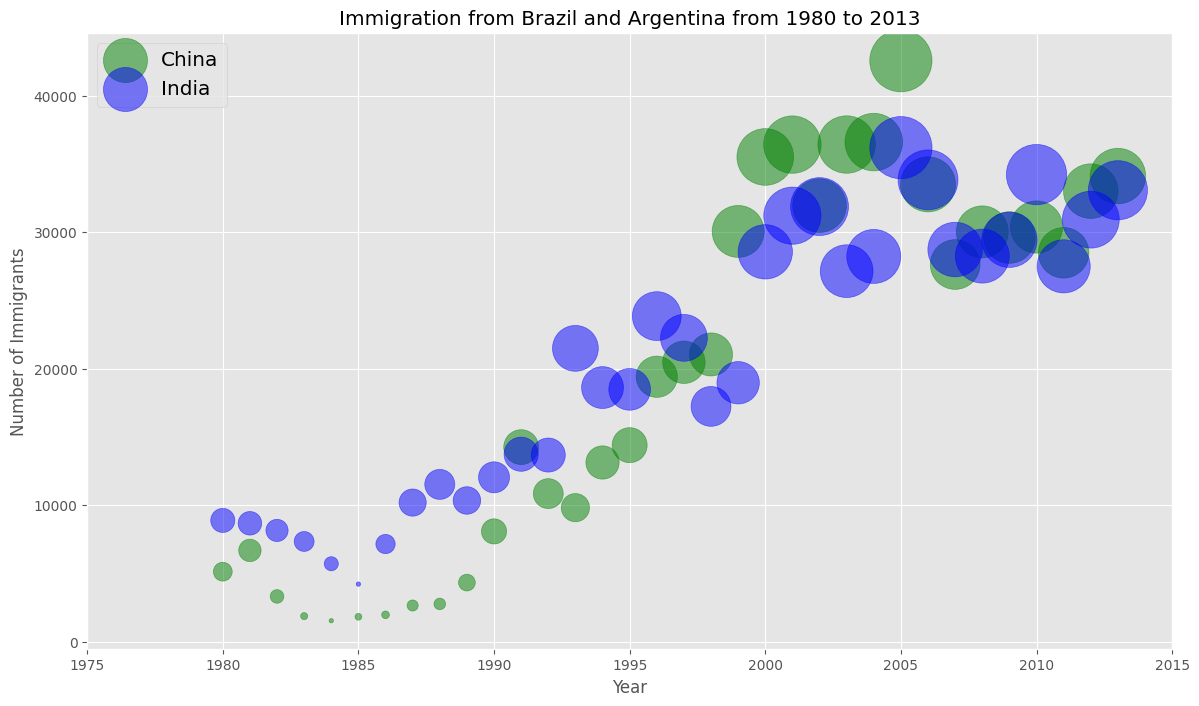

In [209]:
### type your answer here

# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')



<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:  
    
    # China
    ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights
                        xlim=(1975, 2015)
                       )

    # India
    ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

    ax0.set_ylabel('Number of Immigrants')
    ax0.set_title('Immigration from China and India from 1980 - 2013')
    ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


```

</details>


### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01">Alex Aklson</a>


### Other Contributors
[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01),
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01),
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01),
[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01).


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2021-05-29 | 2.6 | Weiqing Wang | Fixed typos and code smells. |
| 2021-01-20  | 2.5 | LakshmiHolla  | Changed TOC markdown section|
| 2021-01-05  | 2.4  | LakshmiHolla  |  Changed markdown for outliers |
| 2020-11-12  | 2.3  | LakshmiHolla  |  Added example code for outliers |
| 2020-11-03  | 2.2  | LakshmiHolla  |  Changed URL of excel file |
| 2020-09-29  | 2.1  | LakshmiHolla  |  Made fix to a boxplot label |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
